### **1. Importation des librairies**

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Importation de l'extension data_table pour l'affichage optimisé des dataframes
#from google.colab import data_table


In [2]:
# Importation du module os pour interagir avec le système d'exploitation
import os
path = '../../../../images/image_train/'

list_img = os.listdir(path)

print('le nombre total d\'image dans le repertoire image_train est de :', len(list_img))

## le nombre d'images correspond au nombre de ligne


le nombre total d'image dans le repertoire image_train est de : 84916


In [3]:
#with os.scandir(path) as dir_contents:
    #for i in dir_contents:
        #print(i.name) # nom du fichier ou répertoire
        #print(i.is_file()) # True si entrée est un fichier sinon False
        #print(i.is_dir()) # True si entrée es un répertoire sinon False
        #print(i.stat()) # Retourne un objet os.stat_result qui contient 
        # diverses informations sur l'entrée, telles que la taille, 
        # les informations sur les permissions, la date de modification, etc.
        
#help(i.stat())

### **2. Analyse de la taille/poids des images**

,Nom image,Taille image (bits)
0,image_1000076039_product_580161.jpg,24968
1,image_1000089455_product_348990858.jpg,38994
2,image_1000092894_product_353108104.jpg,29614
3,image_1000093804_product_343306951.jpg,49355
4,image_1000095646_product_344209267.jpg,30470


,Taille image (bits)
count,84916.000000
mean,26581.791535
std,13845.766608
min,2061.000000
25%,15712.750000
50%,24531.500000
75%,35613.000000
max,106720.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nom image            84916 non-null  object
 1   Taille image (bits)  84916 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


None

Taille image (bits)    40054
dtype: int64


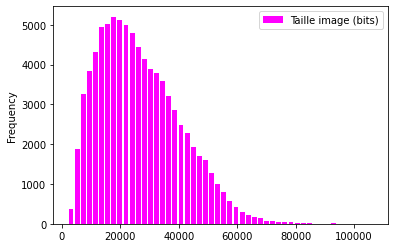

In [4]:
# Traitement des tailles images dans le dossier image_train

# listes vide pour récuperer les tailles et noms de chaque image du dossier
size_img = []
name_img = []

with os.scandir(path) as dossier_img:
    for i in dossier_img:
        size_img.append(i.stat().st_size) # récupère la taille de l'image
        name_img.append(i.name) # récupère le nom de l'aimge
        

# création des DF pour chaque liste
name_img = pd.DataFrame(name_img, columns = ['Nom image'])
size_img = pd.DataFrame(size_img, columns = ['Taille image (bits)'])

## Rappel : 1 octet = 8 bits & 1 Mo = 2^20 octets = 1 048 576 octets

df_img = pd.concat([name_img, size_img], axis = 1) # concatenation des df en colonne
display(df_img.head())
display(df_img.describe())
display(df_img.info())
print(size_img.nunique())

# distribution de la taille des images
df_img.plot.hist(y = ['Taille image (bits)'], bins = 50, rwidth = 0.8, color = 'magenta')
plt.show()

## Les images ont l'air d'avoir des tailles différentes
## et il y a 40 054 tailles différentes.

### Interprétation des résultats

#### Statistiques descriptives :

- Nombre d'images : 84,916
- Taille moyenne : environ 26,581 bits
- Écart type : environ 13,845 bits
- Taille minimale : 2,061 bits
- 25e percentile : 15,712.75 bits
- 50e percentile (médiane) : 24,531.5 bits
- 75e percentile : 35,613 bits
- Taille maximale : 106,720 bits

#### Information sur le DataFrame :

- Il n'y a pas de valeurs manquantes dans les colonnes 'Nom image' et 'Taille image (bits)'.
- La colonne 'Taille image (bits)' est de type int64.
- Nombre d'éléments uniques dans 'Taille image (bits)' : 40,054. Cela confirme qu'il y a une variabilité significative dans les tailles des images.
- Histogramme : La distribution des tailles d'images a été visualisée à l'aide d'un histogramme, montrant la fréquence des différentes tailles.

#### Observations :

- La taille des images varie considérablement.
- La majorité des images ont des tailles inférieures à 35 000 bits, certains outliers allant jusqu'à 106 720 bits.

#### A retenir pour l'entrainement du modèle :
- Normalisation des tailles d'images

In [5]:
# Chargement des fichiers '="X_train_uptade.csv" et "Y_trainCVw08PX.csv"
X_train = pd.read_csv('../../../../X_train.csv', index_col=0)
y_train = pd.read_csv('../../../../y_train.csv', index_col=0)

# Fusion avec merge des deux datasets
df = pd.merge(X_train, y_train, left_index = True, right_index = True)

# Affichage des 5 premières lignes
display(df.head())

# Affichage des 5 dernières lignes
display(df.tail())

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


,designation,description,productid,imageid,prdtypecode
84911,The Sims [ Import Anglais ],NaN,206719094,941495734,40
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,2583
84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,2280
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,1560
84915,Gomme De Collection 2 Gommes Pinguin Glace Ver...,NaN,57203227,684671297,2522


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.9+ MB


### **4. Ajout d'une colonne pour retrouver les images plus facilement**

In [7]:
# incorporation de df_img dans notre df :

# création d'une nouvelle colonne
df['Nom image'] = ['image_' + str(imageid) + '_product_' + str(productid) + '.jpg' for imageid, productid in zip(df['imageid'], df['productid'])]
# df.head() --> vérif

df_with_img = df.merge(df_img, how = 'inner')
#df.drop(['Nom image'], axis = 1, inplace = True)
#df_with_img.info() --> vérif
df_with_img.head()

,designation,description,productid,imageid,prdtypecode,Nom image,Taille image (bits)
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,image_1263597046_product_3804725264.jpg,14010
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg,14854
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,image_938777978_product_201115110.jpg,6898
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,image_457047496_product_50418756.jpg,14404
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,image_1077757786_product_278535884.jpg,20435


### **6. Analyse de la taille/poids des images en fonction de la catégorie**

C:\Users\tgp\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tgp\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tgp\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


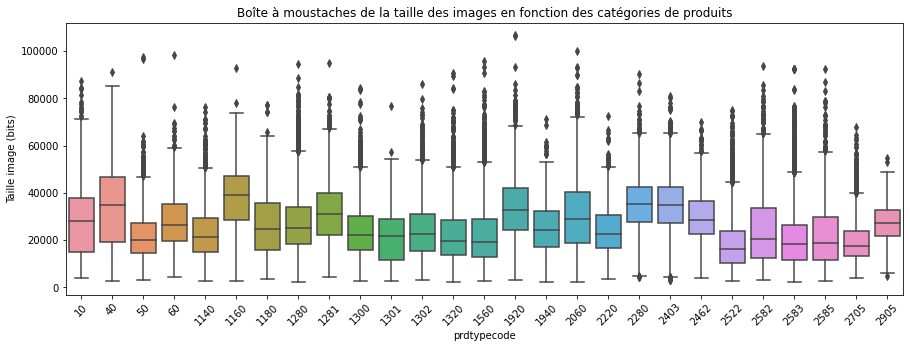

In [9]:
# Distribution des tailles des images en fonction de prdtypecode

plt.figure(figsize = (15, 5))
sns.boxplot(x = 'prdtypecode', y = 'Taille image (bits)', data = df_with_img)
plt.title('Boîte à moustaches de la taille des images en fonction des catégories de produits')
plt.xticks(rotation = 45)
plt.show()

## la taille des images semblent varier en fonction de la catégorie des produits.
## Il pourrait etre intéressant d'approfondir sur ce sujet :
## (variable catégorielle et variable quantitative ? ANOVA - analyse de la variance ? un autre ?)

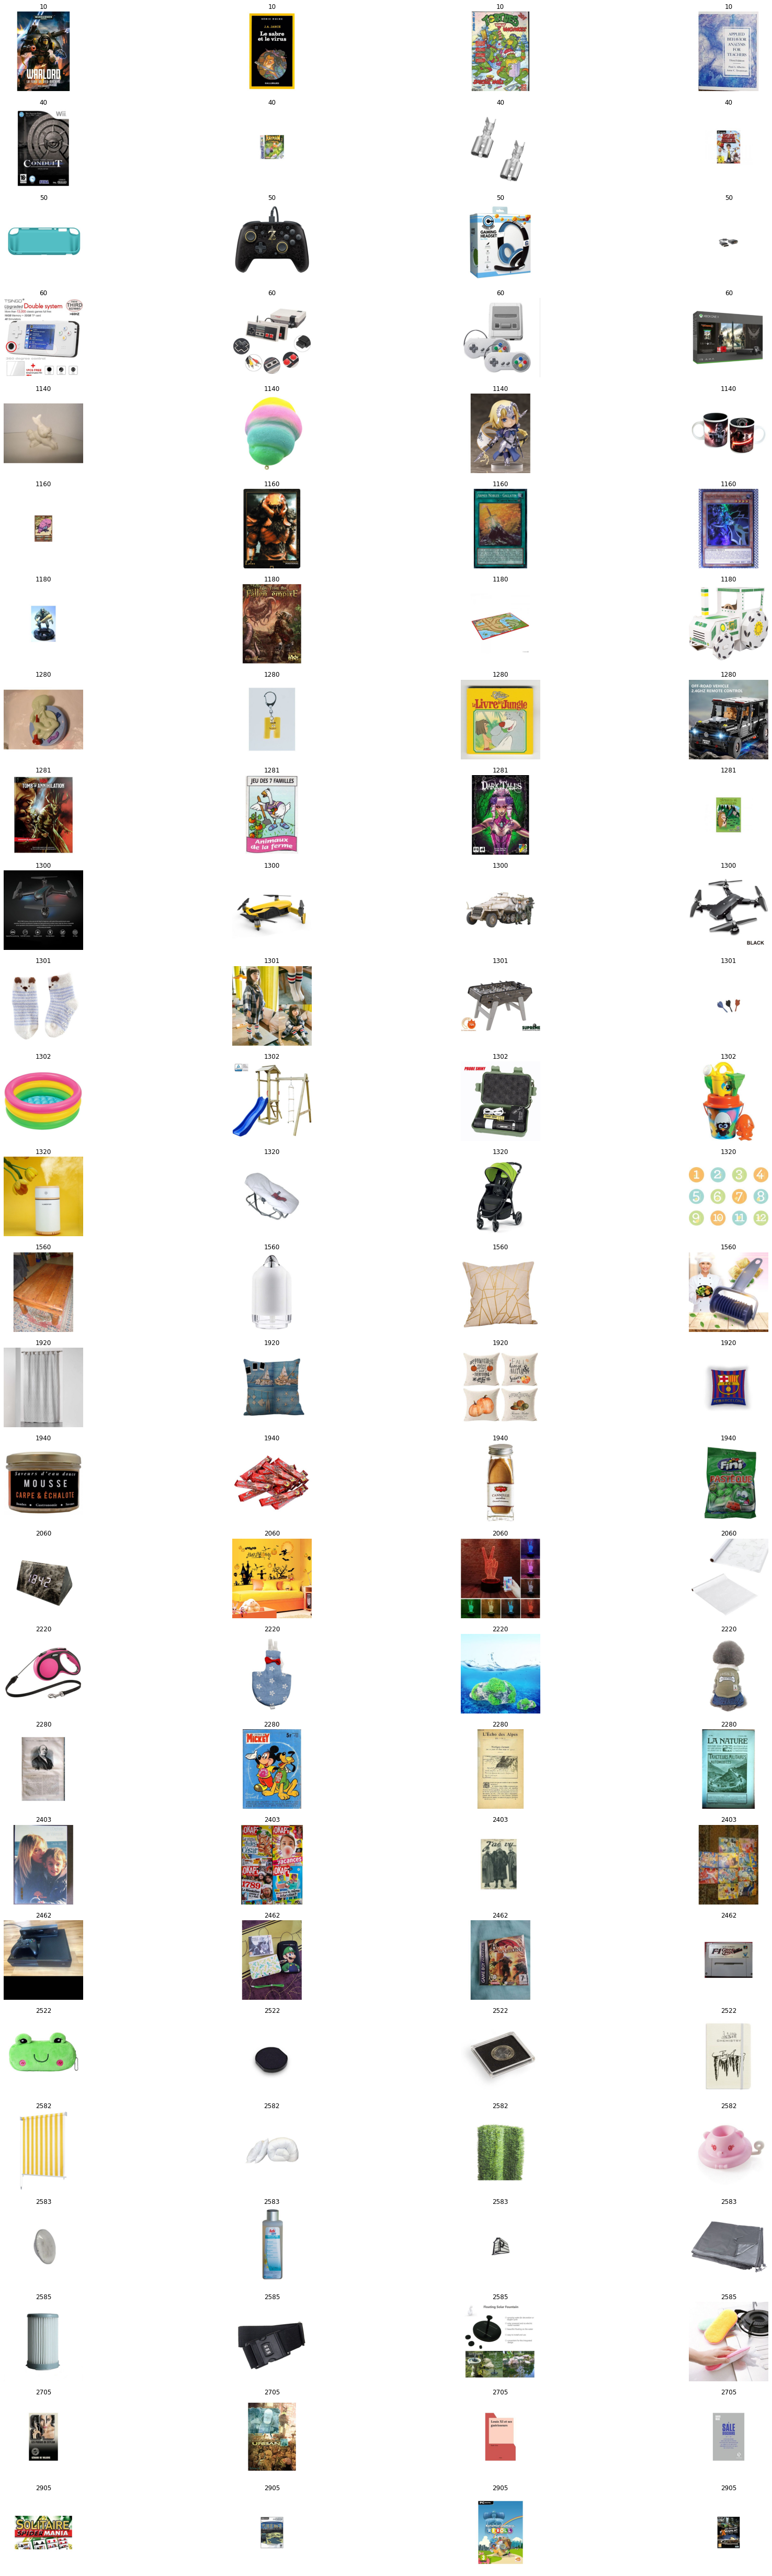

In [10]:
from PIL import Image
# mettre le lien
df_with_img['lien'] = str(path) + '/' + df_with_img['Nom image']

# Sélectionner 5 images aléatoires par catégorie
selected_images = df_with_img.groupby('prdtypecode').apply(lambda x: x.sample(4)).reset_index(drop = True)
# groupement par catégorie / sélection de 4 exemples aléatoires / réinit de l'index du df

# Afficher les images
fig, axs = plt.subplots(27, 4, figsize = (30,90)) 
# création figure 27 lignes = 27 catégories

for i, (index, row) in enumerate(selected_images.iterrows()): 
# iterrows : fourni l'index de chaque ligne
    img = Image.open(row['lien']) # ouvre l'image à partir du lien spécifié
    axs[i // 4, i % 4].imshow(img) # affichage de l'image
    axs[i // 4, i % 4].axis('off') # enlève les axes du subplot
    axs[i // 4, i % 4].set_title(row['prdtypecode']) # titre = catgéorie de l'image

## i // 4 : N° de ligne du subplot dans la grille 
# index i // nb de colonnes = n° de ligne
## i % 4 : N° de colonne du subplot dans la grille
# index i % nb de colonnes = n° de colonne (reste de la division)



Nous avons pu ainsi avoir plus d'informations sur les catégories que nous avons essayé de nommer.

#### TEST ANOVA

L'objectif de ce test est de conclure sur l'influence d'une variable explicative catégorique sur la distribution d'une variable continue à expliquer.
Le raisonnement que nous effectuons avec l'ANOVA est que si la variable qualitative (prdtypecode) n'affecte pas la variable quantitative (Taille_image_bits), la moyenne devrait être la même pour les 27 modalités.

Soit H0 : "μ1 = μ2 = ... = μ14 = μ27"

(Nous rejetons H0 si la valeur p est inférieure à 5 % : Rejeter H0 signifie ici rejeter l'hypothèse selon laquelle la variable qualitative (prdtypecode) n'influence pas la variable quantitative (Taille_images_bits))

In [11]:
# TEST ANOVA

import statsmodels.api

df_with_img = df_with_img.rename(columns={'Taille image (bits)': 'Taille_image_bits'})
df_with_img

anova = statsmodels.formula.api.ols('Taille_image_bits ~ prdtypecode', data = df_with_img).fit()
table = statsmodels.api.stats.anova_lm(anova)
table

#Le p-value (PR (> F)) est inférieur à 5% --> taille de l'image affecte prdtypecode.
#Il y a bien la taille des images qui bougent en fonction de la catégorie.
#La taille de l'image est donc une variable à retenir pour une classification de data.

,df,sum_sq,mean_sq,F,PR(>F)
prdtypecode,1.0,1.290581e+11,1.290581e+11,678.58319,5.253152e-149
Residual,84914.0,1.614959e+13,1.901876e+08,NaN,NaN


##### Le test ANOVA nous suggère qu'il y a une différence significative dans la taille des images entre les différentes catégories de prdtypecode. 

#### Interprétation des résultats obtenus :

- df (degrés de liberté) :
    - Pour prdtypecode: 1 (nombre de catégories - 1) 
    - Pour Residual (résidus) : 84914 (nombres de lignes)
- sum_sq (somme des carrés) : 
    - Pour prdtypecode: 1.290581e+11 (somme des carrés entre les groupes) 
    - Pour Residual : 1.614959e+13 (somme des carrés des résidus)
- mean_sq (moyenne des carrés) : 
    - Pour prdtypecode: 1.290581e+11 (somme des carrés entre les groupes divisée par les degrés de liberté)
    - Pour Residual : 1.901876e+08 (somme des carrés des résidus divisée par les degrés de liberté résiduels)
- F (statistique de test) : 678.58 (ratio de variance entre les groupes sur la variance à l'intérieur des groupes)
- PR(>F) (valeur p) : 5.25e-149 (probabilité que la statistique de test soit au moins aussi extrême que celle observée, sous l'hypothèse nulle)

#### Interprétation :

La valeur p (PR(>F)) est très proche de zéro, bien en dessous du seuil de 0.05, ce qui suggère que la variable prdtypecode a une influence significative sur la taille des images. L'hypothèse nulle (H0) selon laquelle les moyennes des tailles d'images sont égales entre les catégories de prdtypecode est rejetée. En conséquence, la taille de l'image semble varier significativement en fonction de la catégorie prdtypecode. Cela renforce l'idée que la taille des images est une variable pertinente pour la classification des données

### Pour l'amélioration du traitement image :

#### Redimensionnement des images : 
Assurez-vous que toutes les images ont une taille uniforme. Les modèles d'apprentissage profond fonctionnent souvent mieux avec des images de taille fixe.

#### Normalisation des pixels : 
Normalisez les valeurs des pixels pour les ramener dans une plage spécifique (par exemple, [0, 1] ou [-1, 1]). Cela peut aider le modèle à converger plus rapidement.

#### Augmentation des données : 
Utilisez des techniques d'augmentation de données pour générer des variations supplémentaires des images d'entraînement. Cela peut inclure des rotations, des retournements, des zooms, etc. L'augmentation des données peut améliorer la capacité du modèle à généraliser.

#### Suppression des bords noirs : 
Vous pourriez détecter ces bords noirs et les supprimer pour éviter qu'ils n'affectent la performance du modèle.

#### Conversion en niveaux de gris : 
Si la couleur n'est pas cruciale pour la classification, vous pourriez convertir les images en niveaux de gris pour réduire la complexité du modèle.

#### Utilisation de modèles pré-entrainés : 
Vous pourriez exploiter des modèles de réseau neuronal pré-entrainés sur de grandes bases de données (comme ImageNet) pour extraire des caractéristiques des images avant de les alimenter à votre modèle de classification.

#### Élimination du bruit : 
Appliquez des filtres pour réduire le bruit dans les images, ce qui peut améliorer la qualité des caractéristiques extraites par le modèle.

#### Segmentation d'images : 
Si vous avez des informations spécifiques dans les images que vous souhaitez isoler (par exemple, séparer un produit d'un arrière-plan), vous pourriez explorer des techniques de segmentation d'images.

#### Utilisation de techniques avancées : 
Selon les spécificités de votre problème, vous pourriez également envisager des techniques plus avancées telles que le transfert de style, la génération d'images adversaires (GAN), etc.

##### Tester ces améliorations sur un petit sous-ensemble des données pour évaluer leur impact sur la qualité des images et la performance du modèle.

In [11]:
# traitement des bords noirs de l'image

In [12]:
import cv2

def del_bords_noirs(lien):
    
    img = cv2.imread(lien)

    # Image en niveaux de gris
    img_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Détection des contours de l'image
    contours, _ = cv2.findContours(img_g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Coordonnées du rectangle englobant les contours
    x, y, w, h = cv2.boundingRect(contours[0])

    # Recadrer l'image pour éliminer les bords noirs
    img_new = img[y:y+h, x:x+w]

    return img_new

# Ex
lien = 'images/image_train/image.jpg' # a modifier le numero de l'image
img_new = del_bords_noirs(lien)

# VS image originale et image recadrée
cv2.imshow('Image Originale', cv2.imread(lien))
cv2.imshow('Image Recadrée', img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'image' is not defined

In [52]:
def detect_bords_noirs(lien, seuil = 10): # seuil à régler en test
    
    img = cv2.imread(lien)

    # Image en niveau de gris
    img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #pour simplifier le traitement

    # Déterminer la largeur et la hauteur de l'image
    h, l = img_g.shape

    # Initialisation de la région autour de l'image
    zone = 10 #a modifier suivant le seuil

    # Moyenne des valeurs des pixels sur les bords de l'image
    mean_bord_h = np.mean(img_g[:zone, :])
    mean_bord_b = np.mean(img_g[h - zone:, :])
    mean_bord_g = np.mean(img_g[:, :zone])
    mean_bord_d = np.mean(img_g[:, l - zone:])

    # Seuil si image a bords noirs ou non
    seuil_total = (mean_bord_h + mean_bord_b + mean_bord_g + mean_bord_d) / 4

    # VS
    return seuil_total < seuil

# Ajout colonne 'Bords_noirs' au DataFrame
df_with_img['bords_noirs'] = df_with_img['lien'].apply(detect_bords_noirs)

# Affichage du DataFrame avec la nouvelle colonne
print(df_with_img.head())

                                         designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   prdtypecode                                Nom image  Taille_image_bits  \
0           10  image_1263597046_product_3804725264.jpg              14010   
1         2280   image_100

In [60]:
# Afficher les liens des images avec des bords noirs
img_with_bn = df_with_img[df_with_img['bords_noirs'] == True]['lien'].tolist()

# for lien in img_with_bn:
    # print(f"Image avec bords noirs : {lien}")
    
print('Nombre d\'images avec bords noirs : ', len(img_with_bn))

Nombre d'images avec bords noirs :  285


In [62]:
df_with_img.head()

,designation,description,productid,imageid,prdtypecode,Nom image,Taille_image_bits,lien,bords_noirs
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,image_1263597046_product_3804725264.jpg,14010,images/image_train/image_1263597046_product_38...,False
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg,14854,images/image_train/image_1008141237_product_43...,False
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,image_938777978_product_201115110.jpg,6898,images/image_train/image_938777978_product_201...,False
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,image_457047496_product_50418756.jpg,14404,images/image_train/image_457047496_product_504...,False
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,image_1077757786_product_278535884.jpg,20435,images/image_train/image_1077757786_product_27...,False


In [70]:
def del_bords_noirs(lien):
    
    img = cv2.imread(lien)

    # Image en niveaux de gris
    img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Détection des contours de l'image
    contours, _ = cv2.findContours(img_g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Coordonnées du rectangle englobant les contours
    x, y, w, h = cv2.boundingRect(contours[0])

    # Recadrer l'image pour éliminer les bords noirs
    img_new = img[y:y+h, x:x+w]

    return img_new


df_with_img['img_out_b'] = None

# Iteration df_with_img
for index, row in df_with_img[df_with_img['bords_noirs'] == True].iterrows():
    img_path = row['lien']
    
    # Appliquer la fonction pour enlever les bords noirs
    img_out_bords = del_bords_noirs(img_path)

    # Mettre à jour l'image dans le DataFrame (remplacer ou créer une nouvelle colonne, selon vos besoins)
    df_with_img.at[index, 'img_out_b'] = img_out_bords

# Afficher le DataFrame mis à jour
print(df_with_img.head())

                                         designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   prdtypecode                                Nom image  Taille_image_bits  \
0           10  image_1263597046_product_3804725264.jpg              14010   
1         2280   image_100

In [75]:
df_with_img.at[index, 'img_out_b']

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 2, 2],
        [0, 2, 2],
        [0, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 2, 2],
        [0, 2, 2],
        [0, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 2, 2],
        [0, 2, 2],
        [0, 2, 2]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)